# Kopuły
## Importy

In [1]:
#pip install numpy pandas seaborn matplotlib yfinance scipy copulas pingouin
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import spearmanr, norm, lognorm, rankdata
from copulas.bivariate import Clayton, Frank, Gumbel
# from copulas.bivariate import Gaussian
from copulas.visualization import scatter_2d
from pingouin import multivariate_normality

## Ceny akcji NVIDA

In [2]:
nvda_data = yf.download("NVDA", start="2023-01-01", end="2023-12-31")
nvda_data.columns = ["_".join(col).strip() for col in nvda_data.columns]

[*********************100%***********************]  1 of 1 completed


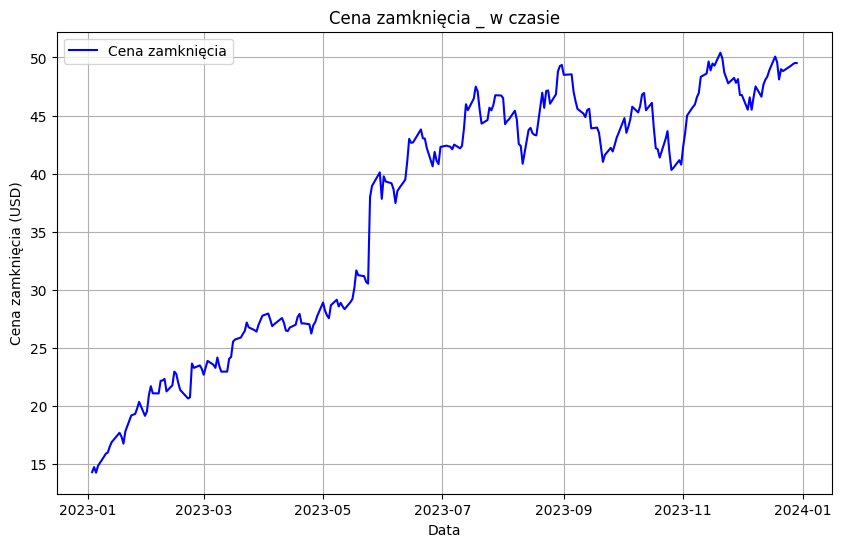

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(nvda_data.index, nvda_data["Close_NVDA"], color='blue', label="Cena zamknięcia")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Cena zamknięcia _ w czasie")
plt.legend()
plt.grid()
plt.show()

In [4]:
nvda_data["diff_nvda"] = nvda_data["Close_NVDA"].diff()
nvda_data = nvda_data.dropna(subset=["diff_nvda"])

## Ceny akcji AMD

In [5]:
amd_data = yf.download("AMD", start="2023-01-01", end="2023-12-31")
amd_data.columns = ["_".join(col).strip() for col in amd_data.columns]
amd_data.shape

[*********************100%***********************]  1 of 1 completed


(250, 6)

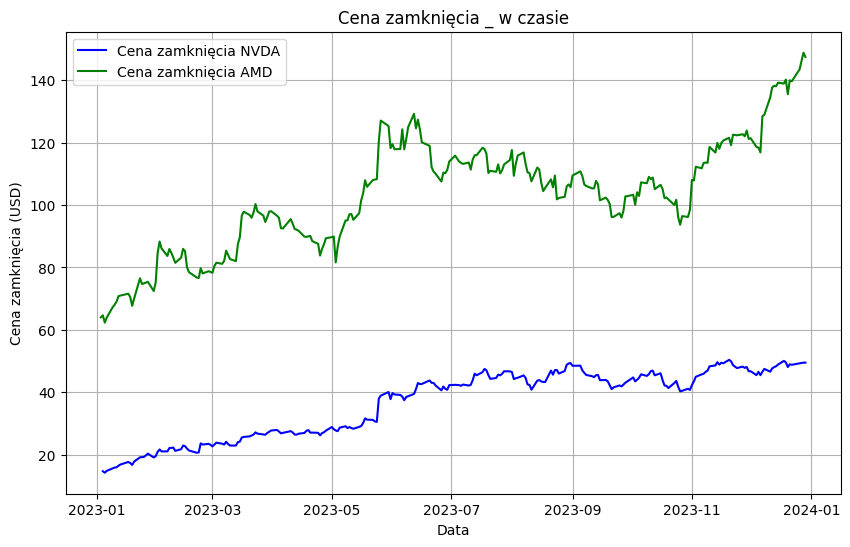

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(nvda_data.index, nvda_data["Close_NVDA"], color='blue', label="Cena zamknięcia NVDA")
plt.plot(amd_data.index, amd_data["Close_AMD"], color='green', label="Cena zamknięcia AMD")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Cena zamknięcia _ w czasie")
plt.legend()
plt.grid()
plt.show()

In [7]:
amd_data["diff_amd"] = amd_data["Close_AMD"].diff()
amd_data = amd_data.dropna(subset=["diff_amd"])

## Ceny akcji Intel

In [8]:
intc_data = yf.download("INTC", start="2023-01-01", end="2023-12-31")
intc_data.columns = ["_".join(col).strip() for col in intc_data.columns]
intc_data.shape

[*********************100%***********************]  1 of 1 completed


(250, 6)

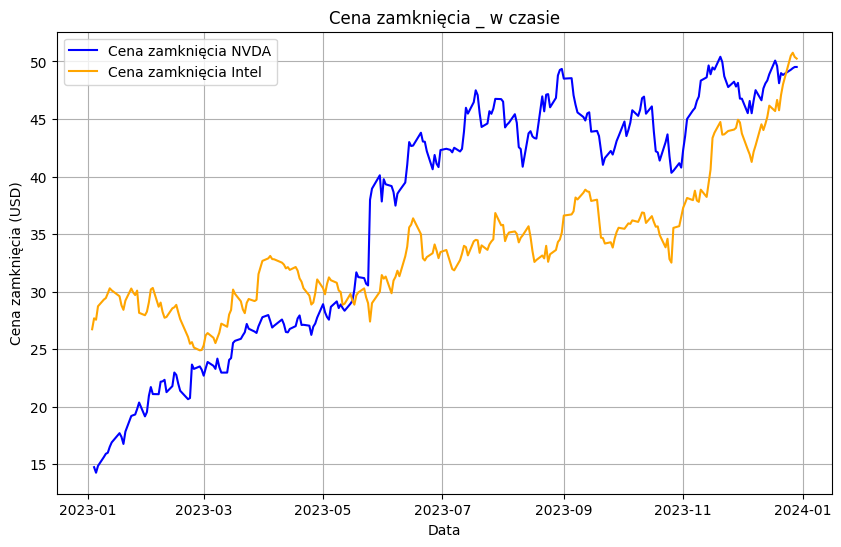

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(nvda_data.index, nvda_data["Close_NVDA"], color='blue', label="Cena zamknięcia NVDA")
# plt.plot(amd_data.index, amd_data["Close_AMD"], color='green', label="Cena zamknięcia AMD")
plt.plot(intc_data.index, intc_data["Close_INTC"], color='orange', label="Cena zamknięcia Intel")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Cena zamknięcia _ w czasie")
plt.legend()
plt.grid()
plt.show()

In [10]:
intc_data["diff_intc"] = intc_data["Close_INTC"].diff()
intc_data = intc_data.dropna(subset=["diff_intc"])

## Indeks giełdowy Nasdaq-100

In [11]:
nasdaq_data = yf.download("^NDX", start="2023-01-01", end="2023-12-31")
nasdaq_data.columns = ["_".join(col).strip() for col in nasdaq_data.columns]
nasdaq_data.shape

[*********************100%***********************]  1 of 1 completed


(250, 6)

In [12]:
nasdaq_data.head()

Adj Close_^NDX    Close_^NDX     High_^NDX  \
Date                                                                    
2023-01-03 00:00:00+00:00    10862.639648  10862.639648  11093.099609   
2023-01-04 00:00:00+00:00    10914.799805  10914.799805  10981.459961   
2023-01-05 00:00:00+00:00    10741.219727  10741.219727  10842.330078   
2023-01-06 00:00:00+00:00    11040.349609  11040.349609  11082.589844   
2023-01-09 00:00:00+00:00    11108.450195  11108.450195  11304.839844   

                               Low_^NDX     Open_^NDX  Volume_^NDX  
Date                                                                
2023-01-03 00:00:00+00:00  10770.929688  11038.419922   4780650000  
2023-01-04 00:00:00+00:00  10785.530273  10949.339844   5085380000  
2023-01-05 00:00:00+00:00  10728.259766  10837.250000   4764270000  
2023-01-06 00:00:00+00:00  10696.419922  10807.459961   5199780000  
2023-01-09 00:00:00+00:00  11085.320312  11133.070312   5132190000

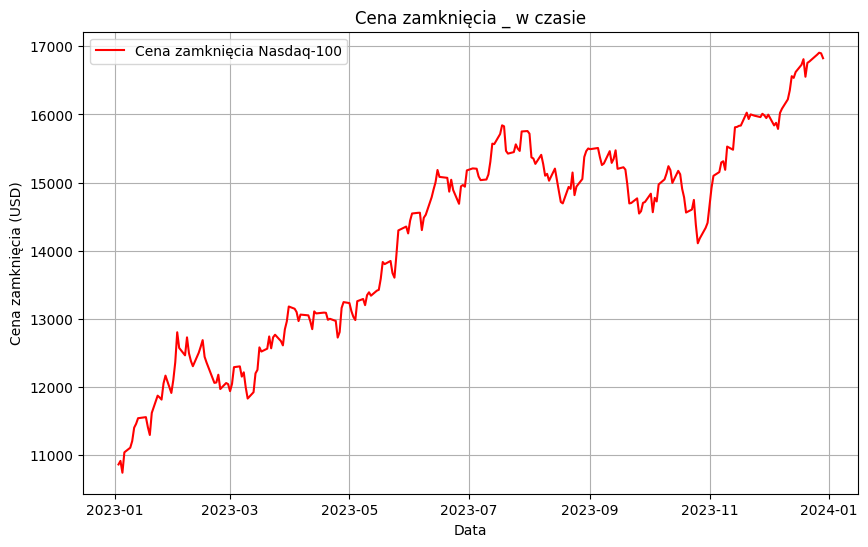

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot(nvda_data.index, nvda_data["Close_NVDA"], color='blue', label="Cena zamknięcia NVDA")
# plt.plot(amd_data.index, amd_data["Close_AMD"], color='green', label="Cena zamknięcia AMD")
# plt.plot(intc_data.index, intc_data["Close_INTC"], color='orange', label="Cena zamknięcia Intel")
plt.plot(nasdaq_data.index, nasdaq_data["Close_^NDX"], color='red', label="Cena zamknięcia Nasdaq-100")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Cena zamknięcia _ w czasie")
plt.legend()
plt.grid()
plt.show()

In [14]:
nasdaq_data["diff_nasdaq"] = nasdaq_data["Close_^NDX"].diff()
nasdaq_data = nasdaq_data.dropna(subset=["diff_nasdaq"])

## Dopasowanie dat

In [15]:
# Dopasowanie dat
combined_data = nvda_data[["diff_nvda"]].join(
    amd_data[["diff_amd"]],
    how="inner"  # Tylko wspólne daty
)

print(combined_data.head())

                           diff_nvda  diff_amd
Date                                          
2023-01-04 00:00:00+00:00   0.434000  0.640007
2023-01-05 00:00:00+00:00  -0.483999 -2.330002
2023-01-06 00:00:00+00:00   0.594000  1.629997
2023-01-09 00:00:00+00:00   0.769000  3.279999
2023-01-10 00:00:00+00:00   0.281000  0.810005


In [16]:
print(combined_data.shape)

(249, 2)


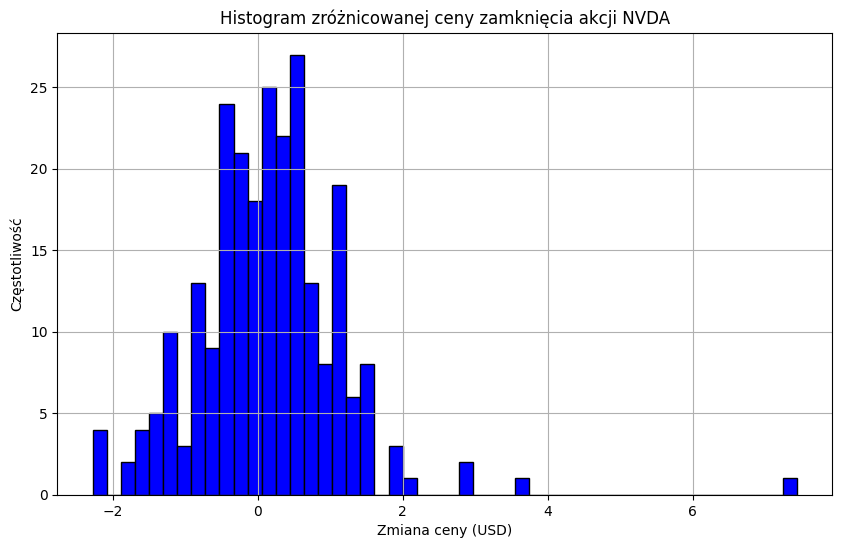

In [17]:
plt.figure(figsize=(10, 6))
combined_data["diff_nvda"].hist(bins=50, edgecolor='k', color='blue')
plt.title("Histogram zróżnicowanej ceny zamknięcia akcji NVDA")
plt.xlabel("Zmiana ceny (USD)")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

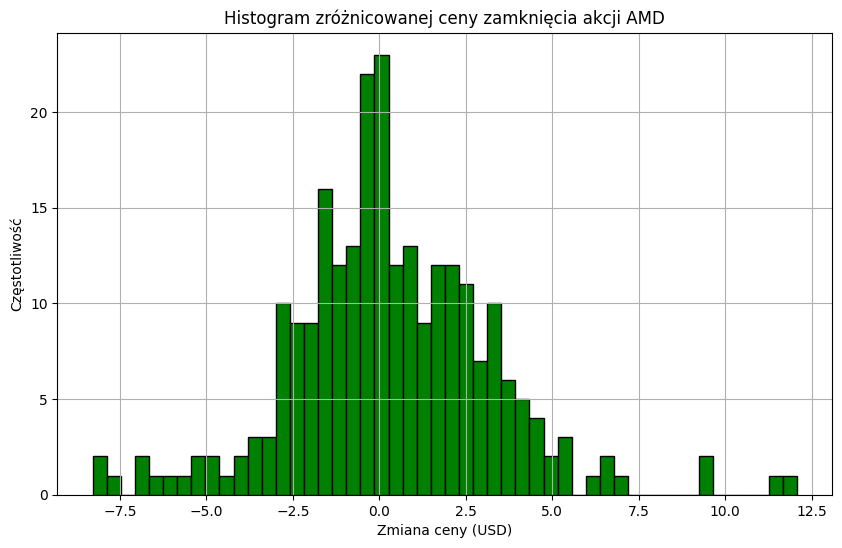

In [18]:
plt.figure(figsize=(10, 6))
combined_data["diff_amd"].hist(bins=50, edgecolor='k', color='green')
plt.title("Histogram zróżnicowanej ceny zamknięcia akcji AMD")
plt.xlabel("Zmiana ceny (USD)")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

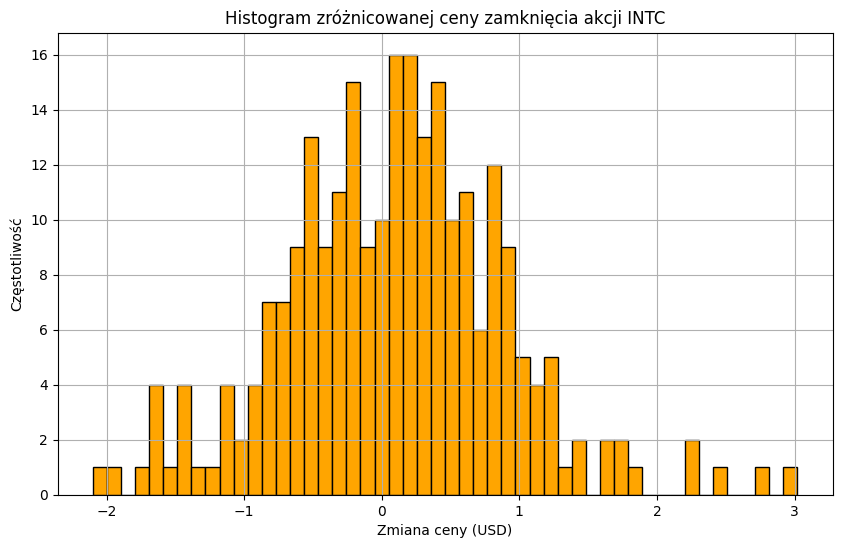

In [19]:
plt.figure(figsize=(10, 6))
intc_data["diff_intc"].hist(bins=50, edgecolor='k', color='orange')
plt.title("Histogram zróżnicowanej ceny zamknięcia akcji INTC")
plt.xlabel("Zmiana ceny (USD)")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

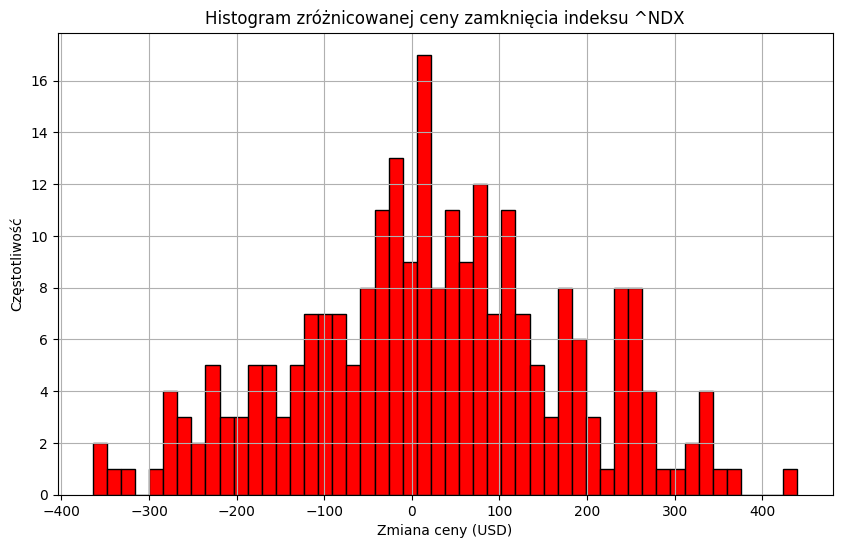

In [20]:
plt.figure(figsize=(10, 6))
nasdaq_data["diff_nasdaq"].hist(bins=50, edgecolor='k', color='red')
plt.title("Histogram zróżnicowanej ceny zamknięcia indeksu ^NDX")
plt.xlabel("Zmiana ceny (USD)")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

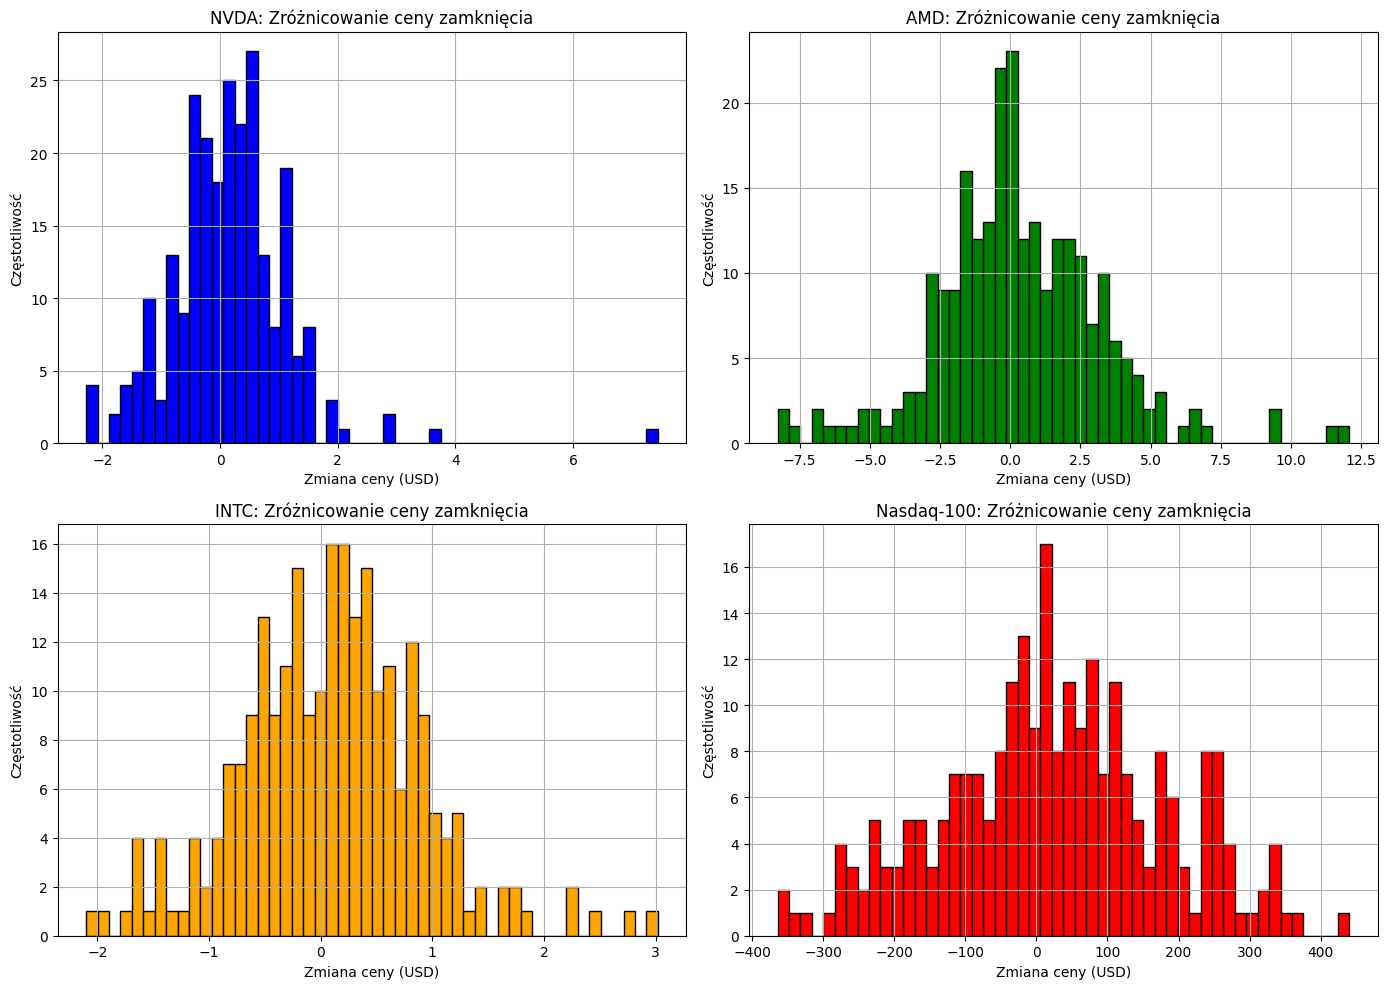

In [21]:
# Tworzenie siatki wykresów
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram NVDA
axes[0, 0].hist(combined_data["diff_nvda"], bins=50, edgecolor='k', color='blue')
axes[0, 0].set_title("NVDA: Zróżnicowanie ceny zamknięcia")
axes[0, 0].set_xlabel("Zmiana ceny (USD)")
axes[0, 0].set_ylabel("Częstotliwość")
axes[0, 0].grid(True)

# Histogram AMD
axes[0, 1].hist(combined_data["diff_amd"], bins=50, edgecolor='k', color='green')
axes[0, 1].set_title("AMD: Zróżnicowanie ceny zamknięcia")
axes[0, 1].set_xlabel("Zmiana ceny (USD)")
axes[0, 1].set_ylabel("Częstotliwość")
axes[0, 1].grid(True)

# Histogram INTC
axes[1, 0].hist(intc_data["diff_intc"], bins=50, edgecolor='k', color='orange')
axes[1, 0].set_title("INTC: Zróżnicowanie ceny zamknięcia")
axes[1, 0].set_xlabel("Zmiana ceny (USD)")
axes[1, 0].set_ylabel("Częstotliwość")
axes[1, 0].grid(True)

# Histogram Nasdaq-100
axes[1, 1].hist(nasdaq_data["diff_nasdaq"], bins=50, edgecolor='k', color='red')
axes[1, 1].set_title("Nasdaq-100: Zróżnicowanie ceny zamknięcia")
axes[1, 1].set_xlabel("Zmiana ceny (USD)")
axes[1, 1].set_ylabel("Częstotliwość")
axes[1, 1].grid(True)

# Dostosowanie odstępów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

## Krok 3

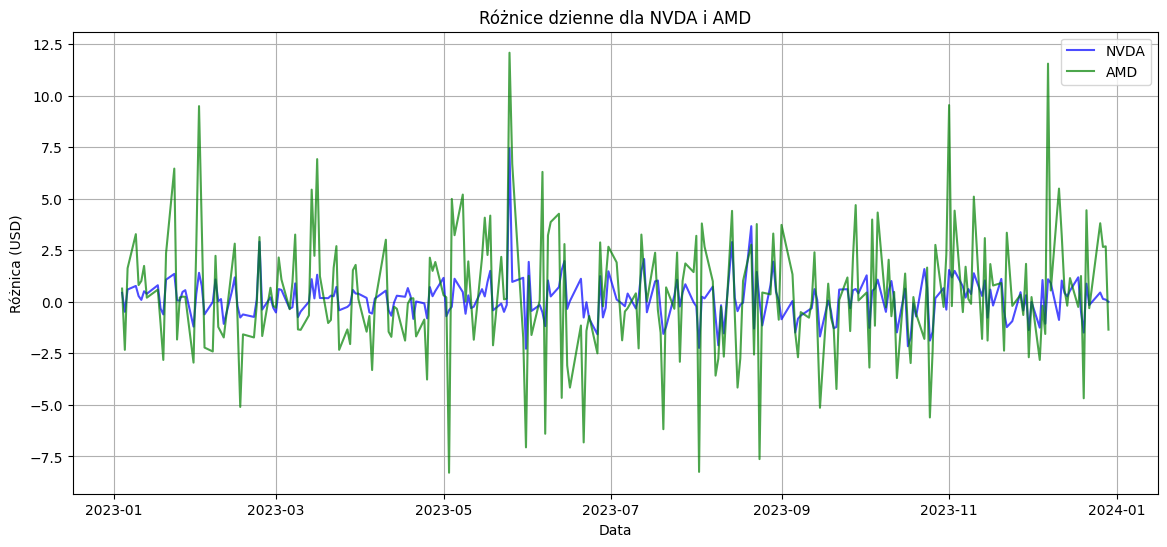

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(combined_data.index, combined_data["diff_nvda"], label="NVDA", color="blue", alpha=0.7)
plt.plot(combined_data.index, combined_data["diff_amd"], label="AMD", color="green", alpha=0.7)
plt.title("Różnice dzienne dla NVDA i AMD")
plt.xlabel("Data")
plt.ylabel("Różnica (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
corr_spearman, _ = spearmanr(combined_data["diff_nvda"], combined_data["diff_amd"])
print(f"Korelacja Spearmana: {corr_spearman}")

Korelacja Spearmana: 0.6451295837533094


## Krok 4

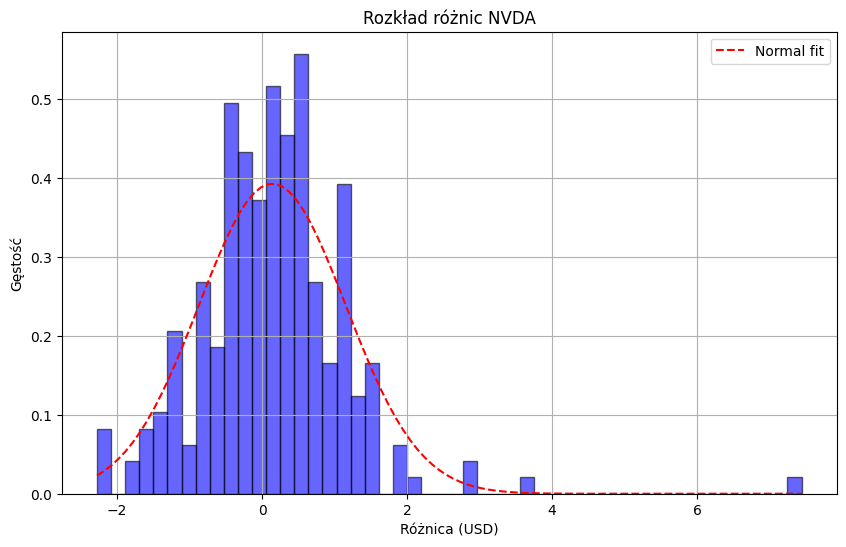

In [24]:
# Dopasowanie rozkładu normalnego do strat NVDA
mean_nvda, std_nvda = norm.fit(combined_data["diff_nvda"])
mean_amd, std_amd = norm.fit(combined_data["diff_amd"])

# Histogramy z dopasowanymi rozkładami
x = np.linspace(combined_data["diff_nvda"].min(), combined_data["diff_nvda"].max(), 100)
pdf_nvda = norm.pdf(x, mean_nvda, std_nvda)

plt.figure(figsize=(10, 6))
plt.hist(combined_data["diff_nvda"], bins=50, density=True, alpha=0.6, color='blue', edgecolor='k')
plt.plot(x, pdf_nvda, 'r--', label="Normal fit")
plt.title("Rozkład różnic NVDA")
plt.xlabel("Różnica (USD)")
plt.ylabel("Gęstość")
plt.legend()
plt.grid(True)
plt.show()

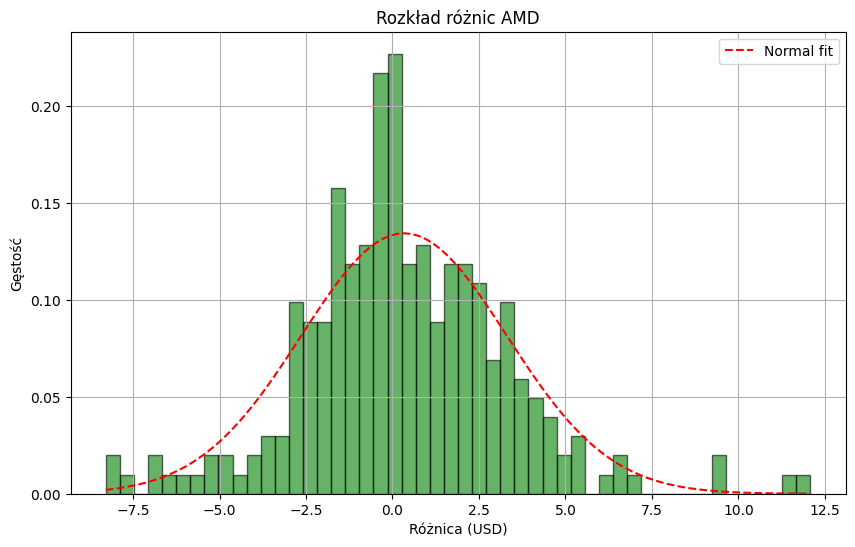

In [25]:
x = np.linspace(combined_data["diff_amd"].min(), combined_data["diff_amd"].max(), 100)
pdf_amd = norm.pdf(x, mean_amd, std_amd)

plt.figure(figsize=(10, 6))
plt.hist(combined_data["diff_amd"], bins=50, density=True, alpha=0.6, color='green', edgecolor='k')
plt.plot(x, pdf_amd, 'r--', label="Normal fit")
plt.title("Rozkład różnic AMD")
plt.xlabel("Różnica (USD)")
plt.ylabel("Gęstość")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Analogicznie można dopasować rozkład log-normalny za pomocą lognorm.fit.

In [27]:
# Do oceny dopasowania można użyć testów statystycznych, takich jak test Andersona-Darlinga lub Kolmogorova-Smirnova.

## Krok 5

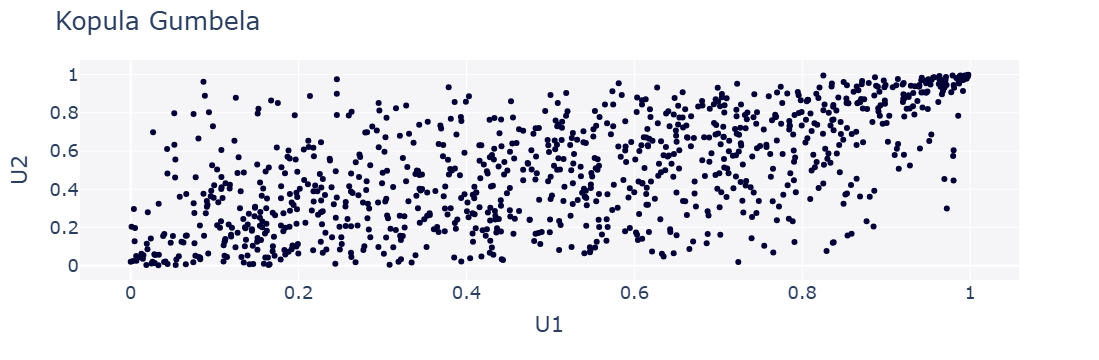

In [31]:
# Przygotowanie danych w [0, 1] (przekształcenie w wartości kwantylowe)
u = rankdata(combined_data["diff_nvda"]) / len(combined_data["diff_nvda"])
v = rankdata(combined_data["diff_amd"]) / len(combined_data["diff_amd"])

# Dopasowanie kopuły Gumbela
gumbel = Gumbel()
gumbel.fit(np.column_stack((u, v)))

# Generowanie próbek z dopasowanej kopuły
samples = gumbel.sample(1000)

# Upewnienie się, że dane są w formacie pandas DataFrame
samples_df = pd.DataFrame(samples, columns=["U1", "U2"])

# Rysowanie dopasowania
scatter_2d(samples_df, title="Kopula Gumbela")

In [ ]:
# Wyznacz log-likelihood, AIC i BIC dla każdej kopuły i wybierz najlepszą.

In [29]:
data = combined_data[["diff_nvda", "diff_amd"]].dropna()
mardia = multivariate_normality(data, alpha=0.05)
print(mardia)

HZResults(hz=np.float64(3.825966797473371), pval=np.float64(5.290527133521829e-09), normal=False)


In [ ]:
# Krok 1: Pobierz historyczne ceny akcji/surowców/walut, które uważasz za powiązane z szeregiem czasowym z pierwszego zadania. Przykład: jeśli w zadaniu 1 korzystano z cen akcji PKO BP, to można wybrać ceny akcji mBank. Skomentuj wybór.

# Krok 2: Przekształć pobrane dane w straty o wybranej częstotliwości. 

# Krok 3: Oblicz podstawowe statystyki, takie jak średnia, wariancja, liczba braków dla szeregów czasowych strat. Narysuj wykres obu szeregów i skomentuj. Policz ich korelację Spearmana/tau Kendalla/dowolne wybrane miary zależności i skomentuj.

# Krok 4: Dopasuj rozkłady normalny i log-normalny do obu szeregów czasowych strat i oceń ich dopasowanie.

# Krok 5: Dopasuj różne kopuły (T-Studenta, normalną, Claytona, Franka, Gumbela) do połączonych szeregów czasowych strat i użyj kryteriów log-likelihood, AIC i BIC, aby wybrać najlepiej dopasowaną kopułę. Wykonaj test Mardia dla zbadania wielowymiarowej normalności.